In [44]:
# Data Preproccessing
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('Mobile_Dataset.csv')

In [46]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [47]:
dataset = df.values

In [48]:
dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [49]:
X = dataset[:,0:20]

In [50]:
Y = dataset[:,20]

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [52]:
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [53]:
Y = df['price_range']

In [54]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2 , random_state=42)

In [55]:
X_val_and_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.36272545, 0.        , 0.52      , ..., 1.        , 1.        ,
        1.        ],
       [0.15163661, 0.        , 0.88      , ..., 1.        , 1.        ,
        1.        ],
       [0.45691383, 0.        , 0.56      , ..., 1.        , 1.        ,
        1.        ]])

In [56]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [57]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(32, activation="relu", input_shape=(20,)),
 Dense(32,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [59]:
hist = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs=60)

Epoch 1/60
50/50 [==============================] - 1s 15ms/step - loss: 1.3889 - accuracy: 0.2763 - val_loss: 1.3588 - val_accuracy: 0.3550
Epoch 2/60
50/50 [==============================] - 0s 5ms/step - loss: 1.3398 - accuracy: 0.4000 - val_loss: 1.3111 - val_accuracy: 0.4650
Epoch 3/60
50/50 [==============================] - 0s 5ms/step - loss: 1.2580 - accuracy: 0.4913 - val_loss: 1.1930 - val_accuracy: 0.5350
Epoch 4/60
50/50 [==============================] - 0s 4ms/step - loss: 1.1085 - accuracy: 0.5781 - val_loss: 1.0054 - val_accuracy: 0.6300
Epoch 5/60
50/50 [==============================] - 0s 3ms/step - loss: 0.9141 - accuracy: 0.6687 - val_loss: 0.8411 - val_accuracy: 0.7100
Epoch 6/60
50/50 [==============================] - 0s 5ms/step - loss: 0.7606 - accuracy: 0.7350 - val_loss: 0.7104 - val_accuracy: 0.7650
Epoch 7/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.7819 - val_loss: 0.6328 - val_accuracy: 0.7650
Epoch 8/60
50/50 [=

In [60]:
multi_predict_acc = model.evaluate(X_test, Y_test)[1]
multi_predict_acc

7/7 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9350


0.9350000023841858

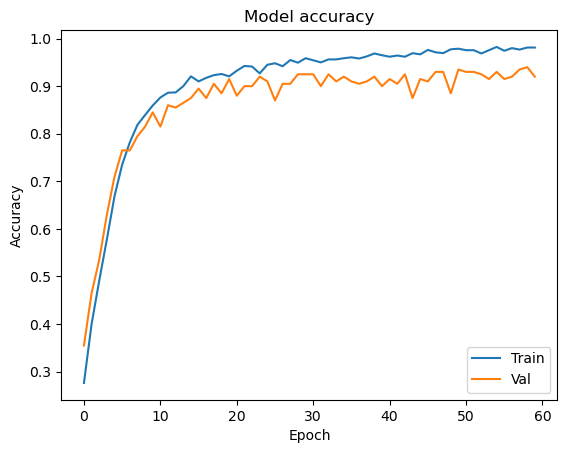

In [61]:
# plotting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [62]:
# creates an array of predictions from a matrix of percentages of classifications
def predictionrelease(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [63]:
 #testing our cross val sets
preds_test = model.predict(X_test)      
test_preds = predictionrelease(preds_test)

7/7 [==============================] - 0s 3ms/step


In [64]:
from sklearn.metrics import classification_report,confusion_matrix
#cross validation
print(classification_report(Y_test,test_preds)) 


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        61
           1       0.85      0.90      0.88        39
           2       0.93      0.87      0.90        47
           3       0.96      0.98      0.97        53

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



In [65]:
#-------------------------------------------KNN Method---------------------------------------------#

In [66]:
#-------------------------------------------KNN Method---------------------------------------------#

In [67]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


In [68]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [69]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [70]:
df.shape

(2000, 21)

In [71]:
pd.isnull(df).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [72]:
#since there isn't any nulls
#data preprocessing
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [73]:
y = df['price_range'] #predictor variable
x = df.drop('price_range', axis = 1) # droping the predictor variable from features set

In [74]:
#Check whether price ranges as target values
y.unique()

array([1, 2, 3, 0], dtype=int64)

In [75]:
# split our dataset into 'training' and 'validation' datasets cause we don't have training and validation dataset
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [76]:
# check whether the split works correctly 
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


In [77]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred_knn = model_knn.predict(x_valid) 

In [79]:
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[98  2  0  0]
 [ 3 95  2  0]
 [ 0  8 86  6]
 [ 0  0  4 96]]


In [80]:
# Check the accuracy of the model
knn_predict_acc = accuracy_score(y_valid, y_pred_knn)
print(knn_predict_acc) 

0.9375


In [81]:
# Check the suitable value for K
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 15}

In [82]:
model_knn = KNeighborsClassifier(n_neighbors= 15)  
model_knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=15)

In [83]:
print(metrics.confusion_matrix(y_valid, y_pred_knn)) 

[[98  2  0  0]
 [ 3 95  2  0]
 [ 0  8 86  6]
 [ 0  0  4 96]]


In [84]:
final_acc_knn = accuracy_score(y_valid, y_pred_knn)
final_acc_knn

0.9375

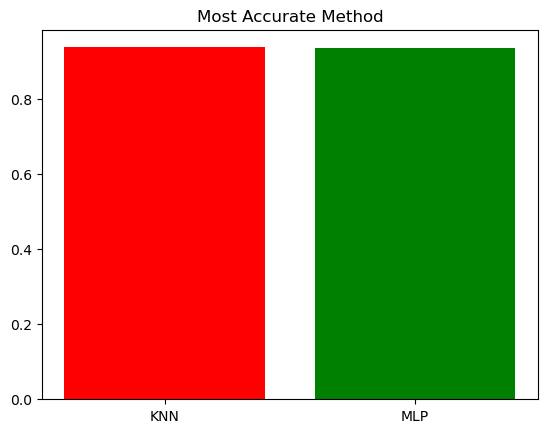

In [86]:
models = ['KNN' , 'MLP']
acc_scores = [final_acc_knn, multi_predict_acc ]
plt.bar(models, acc_scores, color=['red', 'green'])
# plt.ylable('Accuracy Scores')
plt.title("Most Accurate Method")
plt.show()